In [26]:
import numpy as np
N = 201
radius = 1
Lattice = np.zeros((N,N))

center = 100
Lattice[center,center] = 1

print(Lattice)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
# This function is to check if the neighbor cells are empty
# to be used in conjunction with random walk
def neighbors(board,i,j,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append([k,l])
    
    return list1

In [28]:
# This function is to check whether if the 
# neighboring cell is part of the aggregate
def agg_check(board,i,j,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append(board[k][l])

    if 1 in list1: return True#, list1
    else: return False#, list1

In [29]:
from numpy.random import randint
mass = 1
R_max = 5
radius = 1
mass_list = [1]
D_list = [0]

def DLA(Lattice,R_kill,rad_var,mass_var,steps):

    for i in range(steps):

        # Setting up a random starting point for the walker
        start = 'blocked'
        while start == 'blocked':
            X = np.random.randint(0,N)
            Y = np.random.randint(0,N)
            distance = np.sqrt(((X-center)**2)+(Y-center)**2)
            if  R_kill > distance >= rad_var+5:
                Lattice[Y,X] = 1
                start = 'clear'
            else:
                start = 'blocked'
    #print(Lattice)


        walking = True
        while walking == True:
            if agg_check(Lattice,Y,X,N) == False:


                # Random walk
                neighbor_list = neighbors(Lattice,Y,X,N)
                rng1 = np.random.randint(0,len(neighbor_list))
                Lattice[neighbor_list[rng1][0]][neighbor_list[rng1][1]] = 1
                Lattice[Y,X] = 0
                X = neighbor_list[rng1][1]
                Y = neighbor_list[rng1][0]

                # Kill Check
                distance = np.sqrt(((X-center)**2)+(Y-center)**2)
                if distance == R_kill:
                    Lattice[Y,X] = 0
                    walking = False
                
                # Aggregation Check
                if agg_check(Lattice,Y,X,N) == True:
                    walking = False
                    mass_var = mass_var + 1
                    mass_list.append(mass_var)
                    if distance > rad_var:
                        rad_var = distance
                    R_max = rad_var + 5
                    D = np.log(mass_var)/np.log(R_max)
                    D_list.append(D)
            
            else:
                walking = False
    
    return Lattice

Text(0.5, 1.0, 'Mass (N) vs Dimensional/Fractal Coefficient (D)')

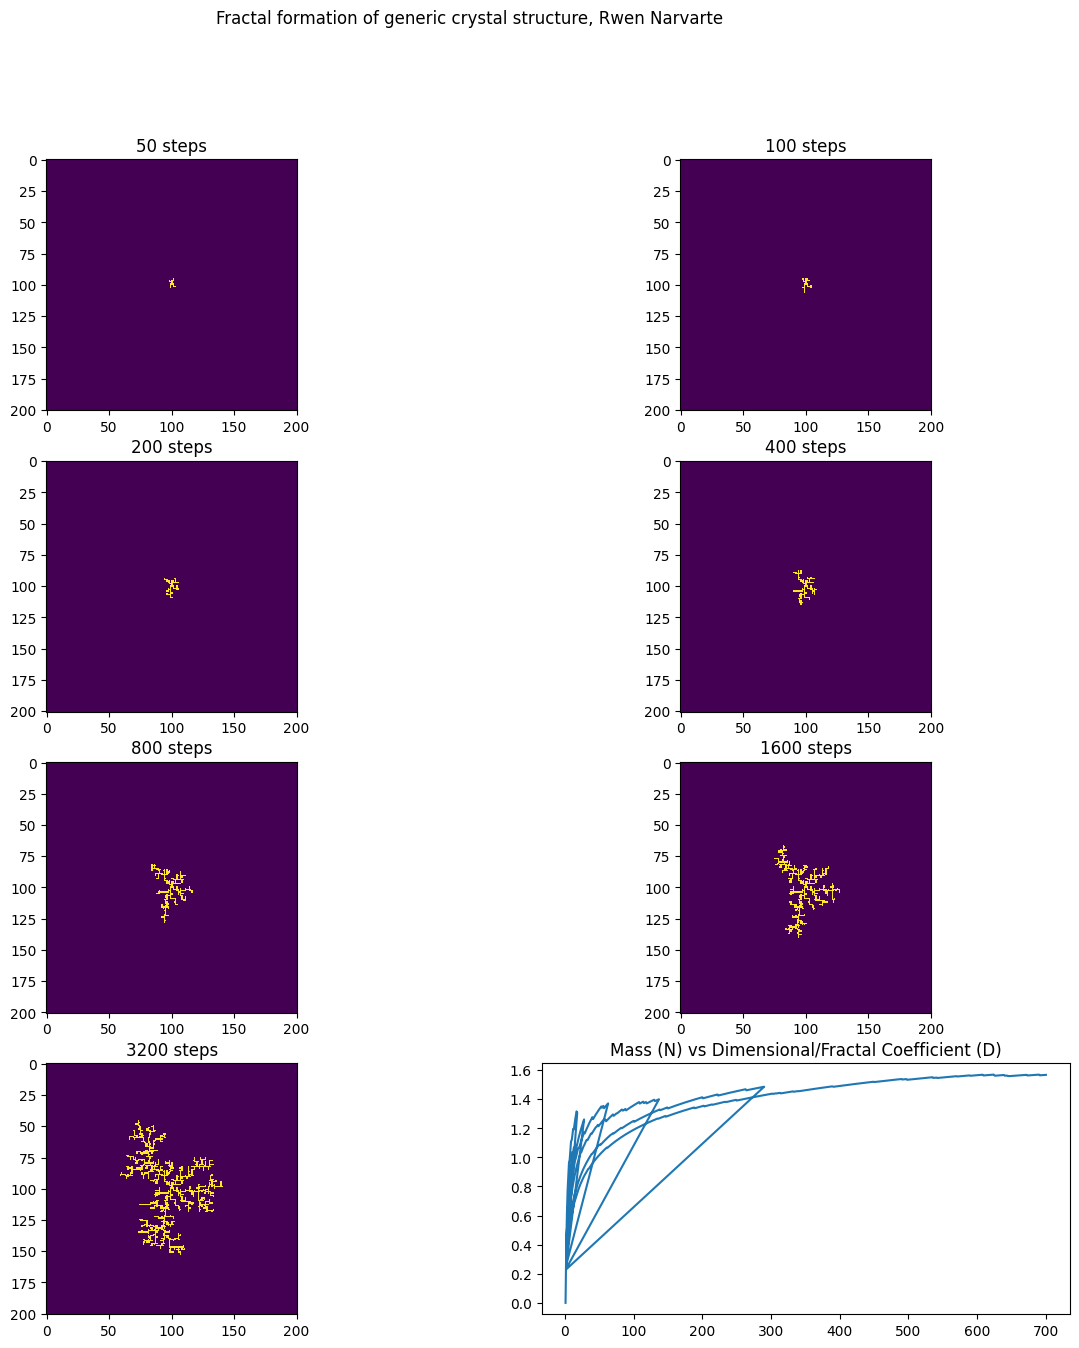

In [30]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4,2, figsize = (15,15))
fig.suptitle('Fractal formation of generic crystal structure, Rwen Narvarte')
axs[0,0].imshow(DLA(Lattice,80,radius,mass,50), interpolation='nearest')
axs[0,0].set_title("50 steps")
axs[0,1].imshow(DLA(Lattice,80,radius,mass,50), interpolation='nearest')
axs[0,1].set_title("100 steps")
axs[1,0].imshow(DLA(Lattice,80,radius,mass,100), interpolation='nearest')
axs[1,0].set_title("200 steps")
axs[1,1].imshow(DLA(Lattice,80,radius,mass,200), interpolation='nearest')
axs[1,1].set_title("400 steps")
axs[2,0].imshow(DLA(Lattice,80,radius,mass,400), interpolation='nearest')
axs[2,0].set_title("800 steps")
axs[2,1].imshow(DLA(Lattice,80,radius,mass,800), interpolation='nearest')
axs[2,1].set_title("1600 steps")
axs[3,0].imshow(DLA(Lattice,80,radius,mass,1600), interpolation='nearest')
axs[3,0].set_title("3200 steps")
axs[3,1].plot(mass_list,D_list)
axs[3,1].set_title("Mass (N) vs Dimensional/Fractal Coefficient (D)")


Text(0.5, 1.0, 'Mass (N) vs Dimensional/Fractal Coefficient (D)')

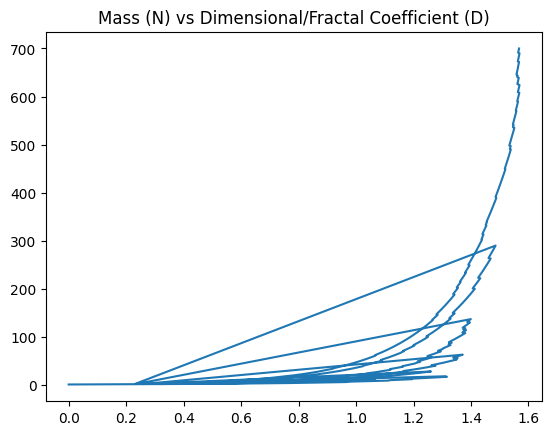

In [33]:
fig, axs = plt.subplots()
axs.plot(D_list,mass_list)
axs.set_title("Mass (N) vs Dimensional/Fractal Coefficient (D)")